# Ogata-Banks Solution

The figure below depicts the physical system, and the analytical model system at three different times.

![](1DADR.png)

**Panel A** is a depiction of the physical system and the concentration profile along the x-axis at time less than zero. The concentration is zero everywhere.

**Panel B** is a depection of the physical system and the concentration profile along the x-axis at time equal zero (like the Big Bang!). At x < 0, the concentration is suddenly raised to a value of $C_0$ everywhere to the left of the origin, x=0. This condition represents a step function input and is a suitable approximation of some upstream source zone that has a constant concentration. The concentration to the right of the origin (x > 0) is still zero.

**Panel C** is a depiction of the physical system and the concentration profile aling the x-axis at some time greater than zero. The source mass has moved to the right of the origin a distance determined by the species velocity and dispersed along the translational front proportional to the dispersivity in the system. 

The analytical solution (Ogata and Banks, 1961) for this situation is: 

$$ C(x,t) = \frac{C_0}{2}[erfc(\frac{x-vt}{2\sqrt{Dt}})+ exp(\frac{xv}{D}) \cdot erfc(\frac{x+vt}{2\sqrt{Dt}})]$$

The solution is applicable for porous media flow, where the velocity is the pore velocity (seepage velocity divided by the porosity). 

## Building a Model

This particular model is all over the internet as an on-line calculator,  but sometimes we have need to build our own version.  In Jupyter Notebooks running a python kernel we need to script the equation above and structure the equation into a useable function.

### Forward define the functions
This step is important, the functions must be defined before they are called -- in an interpreter, this is usually done at the top of the script.  Other scripting languages store the scripts at the end (JavaScript usually keeps scripts at end of the file -- it internally promotes then to the top before it runs its JIT bytecode compiler).

In a compiled language, this step is not as necessary (predefinition is, location not so much). 

These prototype functions are usually written so that they are organic with respect to their variables, so there is no leakage -- in these two functions, the input list is just names, and the output is just a value that must be assigned in the calling script.

## Concentration Profile

The example below uses a function named `ogatabanks` to compute values for $x \ge 0$ and $t \gt 0$, and plot the resulting concentration profile.

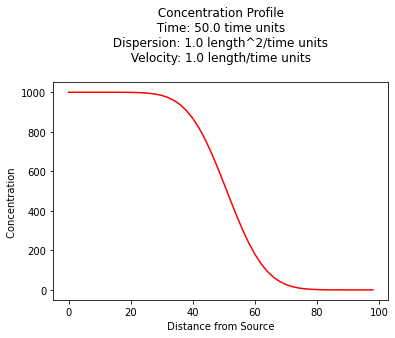

In [1]:
from math import sqrt,erf,erfc,exp  # get special math functions
#
# prototype ogatabanks function
#
def ogatabanks(c_source,space,time,dispersion,velocity):
    term1 = erfc(((space-velocity*time))/(2.0*sqrt(dispersion*time)))
    term2 = exp(velocity*space/dispersion)
    term3 = erfc(((space+velocity*time))/(2.0*sqrt(dispersion*time)))
    ogatabanks = c_source*0.5*(term1+term2*term3)
    return(ogatabanks)
#
# example inputs
#
c_source = 1000.0 # source concentration
space = 100.      # how far in X-direction to extend the plot
time  = 50.       # time since release
dispersion = 1.0  # dispersion coefficient
velocity = 1.0    # pore velocity
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 50   
deltax = space/how_many_points
x = [i*deltax for i in range(how_many_points)] # constructor notation
c = [0.0 for i in range(how_many_points)]      # constructor notation
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c[i] = ogatabanks(c_source,x[i],time,dispersion,velocity)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration Profile \n Time: " + repr(time) + " time units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Distance from Source ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

## Concentration History

Its also quite reasonable to build a history (concentration versus time at some location) - the script is practically the same, except time is the variable instead of space.

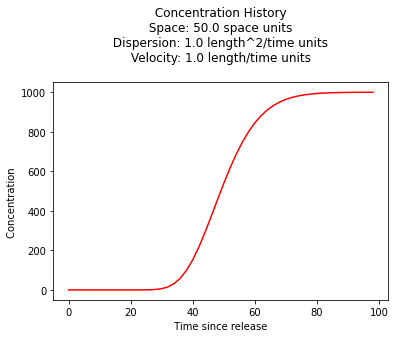

In [2]:
from math import sqrt,erf,erfc,exp  # get special math functions
#
# prototype ogatabanks function
#
def ogatabanks(c_source,space,time,dispersion,velocity):
    term1 = erfc(((space-velocity*time))/(2.0*sqrt(dispersion*time)))
    term2 = exp(velocity*space/dispersion)
    term3 = erfc(((space+velocity*time))/(2.0*sqrt(dispersion*time)))
    ogatabanks = c_source*0.5*(term1+term2*term3)
    return(ogatabanks)
#
# example inputs
#
c_source = 1000.0 # source concentration
space = 50.      # where in X-direction are we
time  = 100.      # how far in T-direction to extend the plot
dispersion = 1.0  # dispersion coefficient
velocity = 1.0    # pore velocity
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 50   
deltat = time/how_many_points
t = [i*deltat for i in range(how_many_points)] # constructor notation
c = [0.0 for i in range(how_many_points)]      # constructor notation

t[0]=1e-5 #cannot have zero time, so use really small value first position in list
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c[i] = ogatabanks(c_source,space,t[i],dispersion,velocity)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(t,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration History \n Space: " + repr(space) + " space units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Time since release ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

## References

1. [Ogata, A. and Banks,R. B. (1961) A Solution of the Differential Equation of Longitudinal Dispersion in Porous Media. USGS Professional Paper 411-A.](https://pubs.usgs.gov/pp/0411a/report.pdf) 